# Stationarity and Optimal VAR Lag Order

In [12]:
%reset -f

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from scipy.stats import linregress

In [14]:
df_r = pd.read_excel('/Users/cristianosalvagnin/Documents/GitHub/EUA_Volatility_DII_p/Data/EUA_All_Phases_Daily.xlsx')
df_r = df_r.drop(columns=['Date'])

In [15]:
scaler = StandardScaler()
data_r_s = scaler.fit_transform(df_r.iloc[:,:])

In [16]:
df_r_s = pd.DataFrame(data_r_s, columns=df_r.columns[:])

In [17]:
labels = [
    'EUA', 'GPR', 'VSTOXX', 'UncEURUSD', 'UncEURJPY', 'UncEURGBP', 'UncEURCHF',
    'NatGas', 'ElecES', 'ElecDE', 'ElecFR', 'CoalFut', 'CuFut', 'Brent',
    'AgFut', 'Gold', 'EURUSD', 'EURJPY', 'EURGBP', 'EURCHF', 'WHNewEnergy',
    'BbgEnergy', 'SolCEA', 'ESTXElect', 'SEF EU50', 'LC100EU', 'MSCIEnrg',
    'ERIX', 'Euronext100', 'IBEX35', 'DAX', 'CAC', 'FTSEmib', 'Bund10y', 'Bond3m'
]

In [18]:
df_r_s.columns = labels
df_r.columns = labels

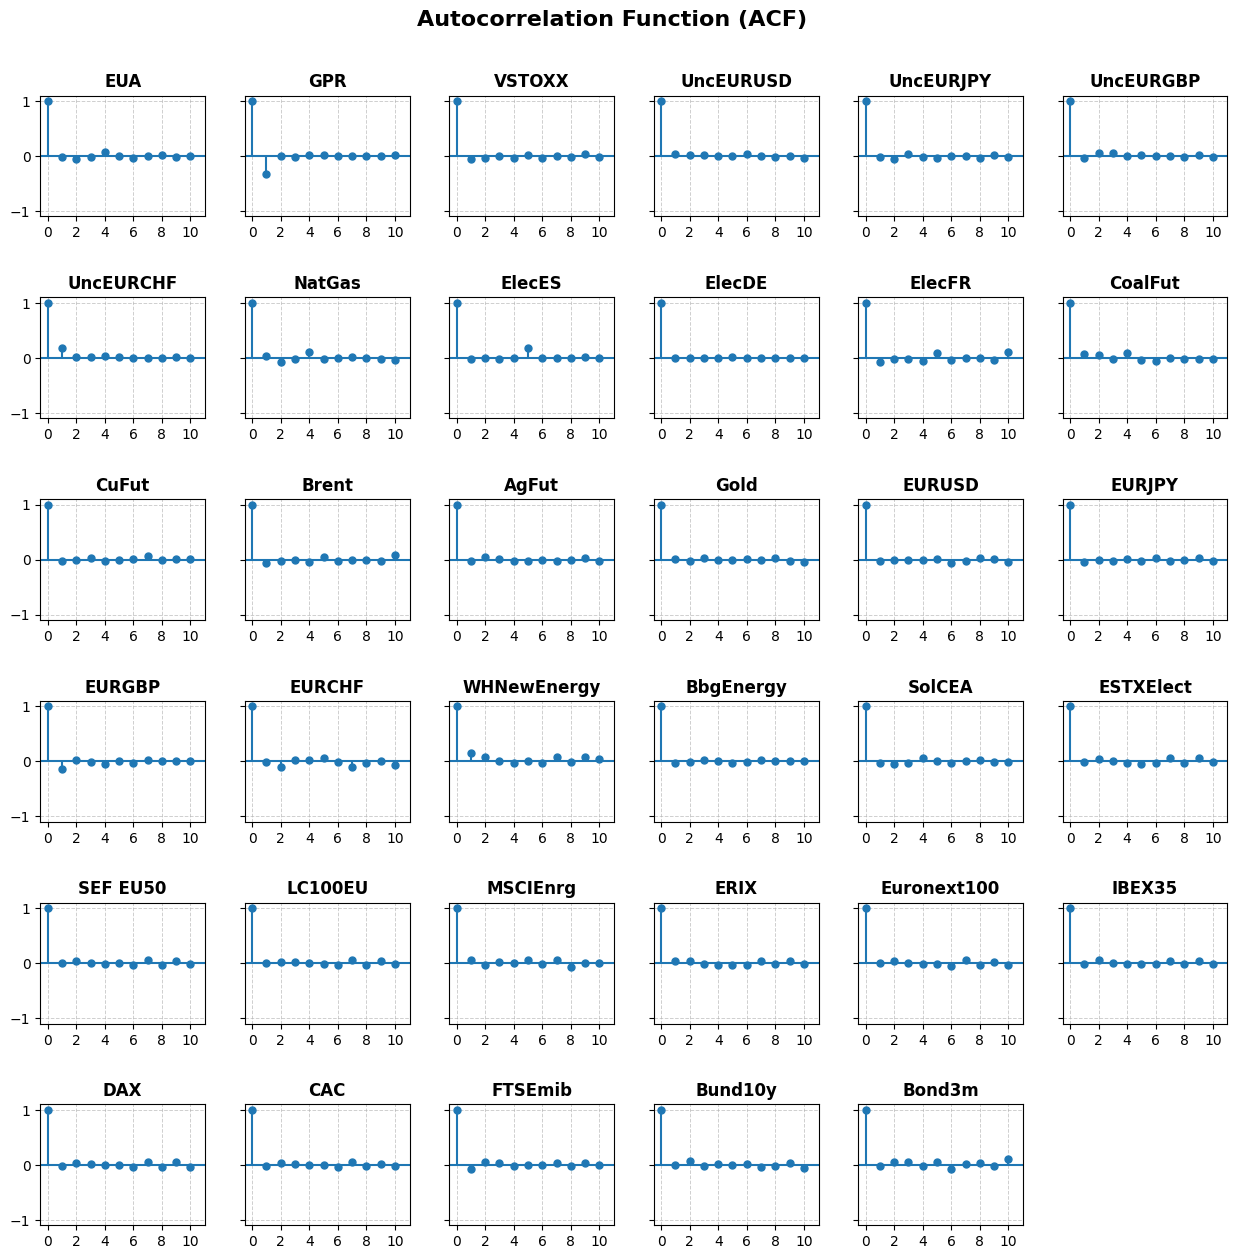

In [19]:

n_vars = len(df_r_s.columns)
n_cols = int(np.ceil(np.sqrt(n_vars)))
n_rows = n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 13), sharex=False, sharey=True)
axes = axes.flatten()

for i, col in enumerate(df_r_s.columns):
    plot_acf(df_r_s[col].dropna(), ax=axes[i], lags=10, alpha=0.8)
    
    
    axes[i].set_xticks(range(0, 11, 2))
    
    
    axes[i].grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
    
    
    axes[i].tick_params(axis='both', labelsize=10)
    
    
    axes[i].set_title(f"{col}", fontsize=12, fontweight='bold')
    
    
    axes[i].set_ylim(-1.1, 1.1)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Autocorrelation Function (ACF)', fontsize=16, fontweight='bold')

plt.tight_layout(pad=2.5)
plt.show()

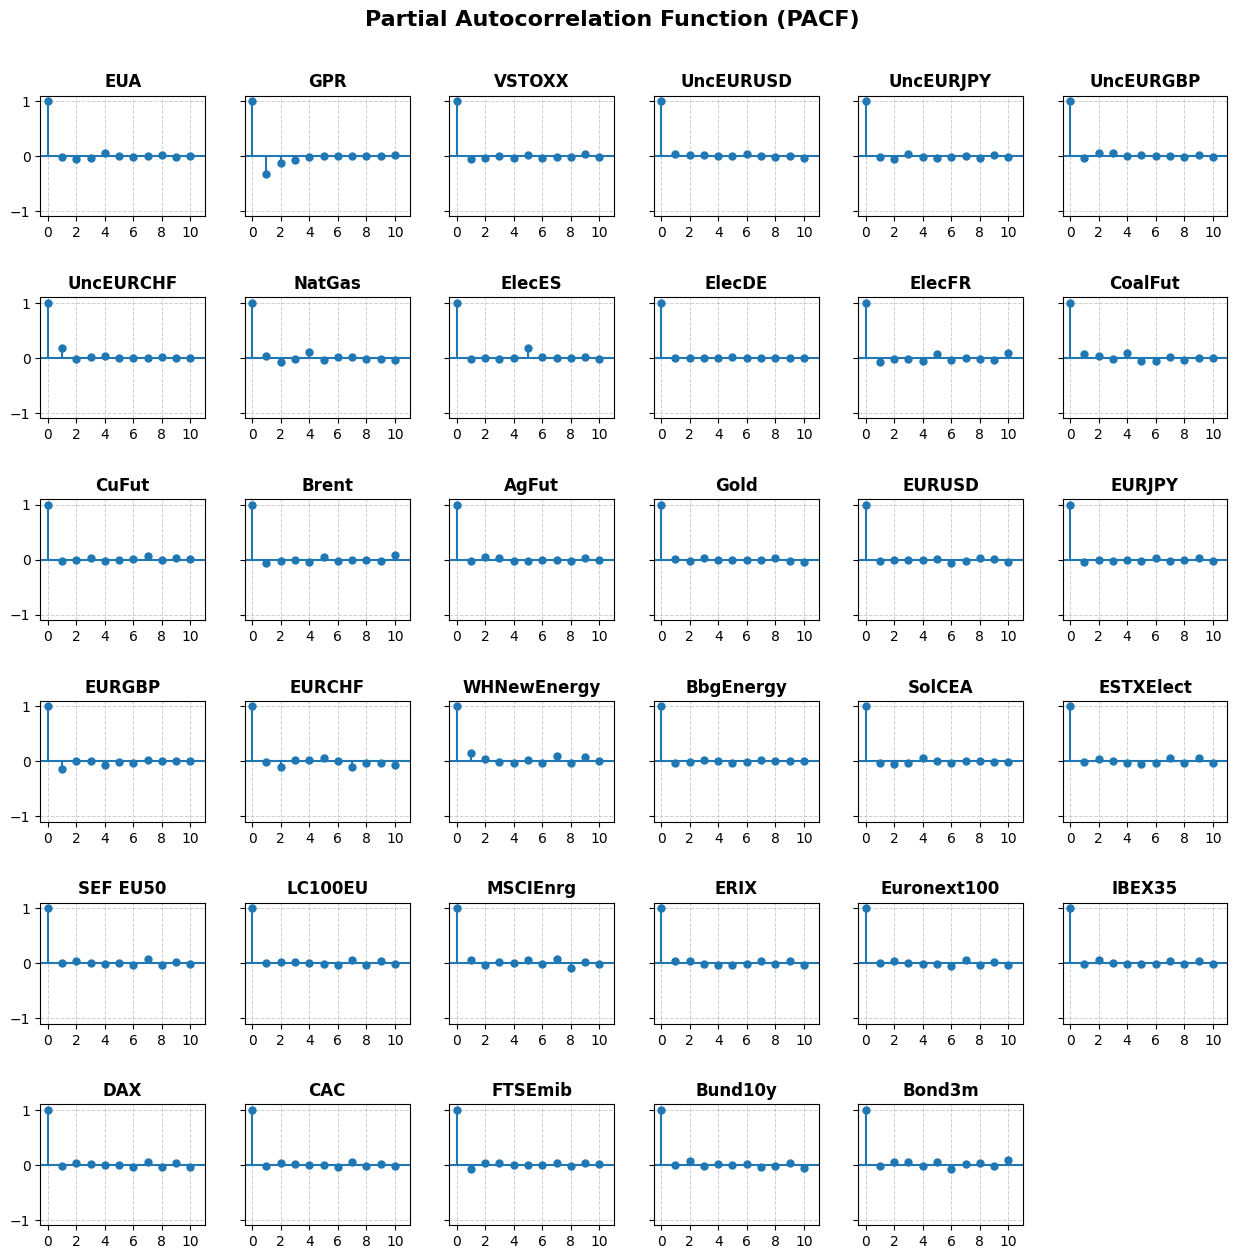

In [20]:

n_vars = len(df_r_s.columns)
n_cols = int(np.ceil(np.sqrt(n_vars)))
n_rows = n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 13), sharex=False, sharey=True)
axes = axes.flatten()

for i, col in enumerate(df_r_s.columns):
    plot_pacf(df_r_s[col].dropna(), ax=axes[i], lags=10, alpha=0.8)

    axes[i].set_xticks(range(0, 11, 2))
    
    axes[i].grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
    
    axes[i].tick_params(axis='both', labelsize=10)
    
    axes[i].set_title(f"{col}", fontsize=12, fontweight='bold')
    
    axes[i].set_ylim(-1.1, 1.1)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Partial Autocorrelation Function (PACF)', fontsize=16, fontweight='bold')

plt.tight_layout(pad=2.5)
plt.show()

In [21]:
results = []

for column in df_r_s.columns:
    adf_result = adfuller(df_r_s[column])
    results.append({
        'Asset': column,
        'ADF Statistic': adf_result[0],
        'p-value': adf_result[1],
        'Critical Values': adf_result[4],
        'Stationary': adf_result[1] < 0.05
    })

results_df = pd.DataFrame(results)

crit_values_df = pd.DataFrame(results_df['Critical Values'].tolist(), 
                              index=results_df.index)

ADF_results = pd.concat([results_df.drop(columns='Critical Values'), crit_values_df], axis=1)
ADF_results.columns = ['Asset', 'ADF Statistic', 'p-value', 'Stationary', '1%', '5%', '10%']

print(ADF_results)

          Asset  ADF Statistic       p-value  Stationary        1%        5%  \
0           EUA     -15.038364  9.674195e-28        True -3.432621 -2.862543   
1           GPR     -39.378217  0.000000e+00        True -3.432608 -2.862538   
2        VSTOXX     -12.997073  2.735961e-24        True -3.432627 -2.862546   
3     UncEURUSD      -9.957579  2.421169e-17        True -3.432628 -2.862547   
4     UncEURJPY     -25.692109  0.000000e+00        True -3.432609 -2.862538   
5     UncEURGBP     -28.913692  0.000000e+00        True -3.432608 -2.862538   
6     UncEURCHF     -45.237371  0.000000e+00        True -3.432606 -2.862537   
7        NatGas      -9.492228  3.626879e-16        True -3.432625 -2.862545   
8        ElecES     -20.773602  0.000000e+00        True -3.432609 -2.862538   
9        ElecDE     -54.043368  0.000000e+00        True -3.432606 -2.862537   
10       ElecFR     -16.706846  1.445623e-29        True -3.432613 -2.862540   
11      CoalFut      -9.772322  7.082209

In [24]:
model = VAR(df_r_s)
lag_order = model.select_order(maxlags=10)
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -28.49     -28.42*   4.243e-13      -28.46
1      -30.11*      -27.51  8.377e-14*     -29.17*
2       -29.97      -24.84   9.680e-14      -28.12
3       -29.71      -22.05   1.250e-13      -26.95
4       -29.56      -19.37   1.462e-13      -25.89
5       -29.55      -16.83   1.482e-13      -24.96
6       -29.21      -13.96   2.091e-13      -23.71
7       -28.89      -11.12   2.870e-13      -22.49
8       -28.58      -8.277   3.960e-13      -21.26
9       -28.38      -5.550   4.875e-13      -20.15
10      -28.35      -2.989   5.091e-13      -19.21
--------------------------------------------------
